In [691]:
#Capstone Project Data Cleaning Plan
#import dependencies
#load data into dataframe
#Drop columns we don't need: timestamp, level, tag, race, education (race and education have already been onehot-encoded in datasource)
#Check data types
#Look for outlier values
#Check for duplicate rows

#Investigate and clean specific columns:
    #

In [692]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [693]:
#Set path of input file
file_path = "Resources/Levels_Fyi_Salary_Data.csv"

In [694]:
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [695]:
#Check for duplicate rows
duplicate_rows_df = salaries_df[salaries_df.duplicated()]
print(duplicate_rows_df.shape)
#There are no duplicate columns

(0, 28)


In [696]:
#Drop unneeded columns
salaries_df = salaries_df.drop(columns=['timestamp','level','tag','Race','Education'])
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [697]:
#Check data types
salaries_df.dtypes
#Why is dmaid a float, seems like it should be an int, look into that
#all other types seem reasonable

company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
dtype: object

In [698]:
#look for null values
salaries_df.isnull().sum()

company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
dtype: int64

In [699]:
#try to figure out why dmaid came in as a float, and has two null values
salaries_df['dmaid'].unique()
#no values seem to have anything after the decimal, but NaN is among the values

array([807., 819.,   0., 501., 512., 862., 820., 803., 511., 635., 506.,
       825., 622., 508., 519., 751., 652., 504., 527., 617., 613., 602.,
       532., 753., 752., 623., 556., 669., 628., 566., 515., 560., 528.,
       534., 524., 609., 526., 521., 648., 770., 517., 518., 535., 505.,
       641., 790., 539., 670., 533., 523., 618., 637., 616., 855., 510.,
       563., 757., 659., 625., 691., 705., 576., 811., 679., 541., 544.,
       828., 789., 821., 588., 611., 716., 801., 561., 682., 584., 671.,
        nan, 564., 502., 640., 678., 581., 642., 514., 598., 643., 567.,
       839., 746., 500., 675., 619., 548., 592., 650., 529., 536., 551.,
       573., 610., 766., 702., 724., 547., 604., 656., 513., 649., 503.,
       687., 530., 686., 555., 571., 538., 693., 651., 744., 634., 525.,
       546., 754., 630., 624., 866., 554., 600., 565., 542., 550., 540.,
       632., 734., 520., 881., 509., 522., 612., 531., 804., 577., 759.,
       516., 673., 574., 537., 760., 698., 658.])

In [700]:
#look into NaN value in dmaid
dmaid_nan = salaries_df.loc[pd.isna(salaries_df['dmaid'])]
dmaid_nan
#Two rows have NaN for dmaid, small enough number to fix manually. 

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
14919,CACI,Software Engineer,63000,"Rome, NY",1.0,1.0,63000,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
49136,General Motors,Hardware Engineer,94000,"Troy, MI",3.0,3.0,86000,0.0,8000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [701]:
#Find the dmaid for Troy, MI
find_troy_dmaid = salaries_df.loc[salaries_df['location']=="Troy, MI"]
find_troy_dmaid[['location','dmaid']]

,location,dmaid
36366,"Troy, MI",505.0
36390,"Troy, MI",505.0
39640,"Troy, MI",505.0
43507,"Troy, MI",505.0
49136,"Troy, MI",NaN
58529,"Troy, MI",505.0


In [702]:
#Find the dmaid for Rome, NY
find_romeny_dmaid = salaries_df.loc[salaries_df['location']=="Rome, NY"]
find_romeny_dmaid[['location','dmaid']]

,location,dmaid
14919,"Rome, NY",NaN
50922,"Rome, NY",555.0


In [703]:
#Fix dmaid for row 49136 to be 505 for Troy, MI

salaries_df.at[49136,'dmaid']=505
salaries_df.iloc[49136]['dmaid']

505.0

In [704]:
#Fix dmaid for row 14919 to be 555 for Rome, NY

salaries_df.at[14919,'dmaid']=555
salaries_df.iloc[14919]['dmaid']

555.0

In [705]:
#Now check unique values for dmaid again
salaries_df['dmaid'].unique()

array([807., 819.,   0., 501., 512., 862., 820., 803., 511., 635., 506.,
       825., 622., 508., 519., 751., 652., 504., 527., 617., 613., 602.,
       532., 753., 752., 623., 556., 669., 628., 566., 515., 560., 528.,
       534., 524., 609., 526., 521., 648., 770., 517., 518., 535., 505.,
       641., 790., 539., 670., 533., 523., 618., 637., 616., 855., 510.,
       563., 757., 659., 625., 691., 705., 576., 811., 679., 541., 544.,
       828., 789., 821., 588., 611., 716., 801., 561., 682., 584., 671.,
       555., 564., 502., 640., 678., 581., 642., 514., 598., 643., 567.,
       839., 746., 500., 675., 619., 548., 592., 650., 529., 536., 551.,
       573., 610., 766., 702., 724., 547., 604., 656., 513., 649., 503.,
       687., 530., 686., 571., 538., 693., 651., 744., 634., 525., 546.,
       754., 630., 624., 866., 554., 600., 565., 542., 550., 540., 632.,
       734., 520., 881., 509., 522., 612., 531., 804., 577., 759., 516.,
       673., 574., 537., 760., 698., 658.])

In [706]:
#Check out 5 NaN values in company
company_nan = salaries_df.loc[pd.isna(salaries_df['company'])]
company_nan

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
1403,NaN,Software Engineering Manager,292000,"Austin, TX",15.0,4.0,250000,0.0,42000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
8579,NaN,Software Engineer,85000,"Atlanta, GA",2.0,0.0,85000,0.0,8000.0,Male,...,0,0,0,0,0,0,0,0,0,0
9045,NaN,Software Engineer,47000,"Melbourne, VI, Australia",2.0,1.0,47000,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
26999,NaN,Software Engineer,113000,"Dublin, DN, Ireland",5.0,1.0,113000,0.0,0.0,Male,...,0,1,0,0,0,0,1,0,0,0
29433,NaN,Software Engineer,54000,"Arlington, VA",3.0,2.0,54000,0.0,0.0,Male,...,0,1,0,0,0,0,0,0,0,1


In [707]:
#look to see if everyone in Austin is at the same company
austin_tx = salaries_df.loc[salaries_df['location']=="Austin, TX"]
austin_tx
#They are at a bunch of different companies,the same is true in the other 4 cities. Rather than try to 
#guess at a company for them, let's drop these 5 rows

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
178,IBM,Software Engineer,84000,"Austin, TX",3.0,3.0,80000,100.0,4000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
436,IBM,Product Manager,103000,"Austin, TX",0.0,0.0,0,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
491,Dell Technologies,Software Engineer,225000,"Austin, TX",14.0,14.0,0,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
515,IBM,Software Engineer,83000,"Austin, TX",3.0,3.0,82000,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
526,IBM,Software Engineer,110000,"Austin, TX",8.0,3.0,108000,0.0,2000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62229,Indeed,Product Manager,180000,"Austin, TX",4.0,2.5,158000,0.0,22000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62254,Dell Technologies,Software Engineering Manager,205000,"Austin, TX",10.0,10.0,160000,0.0,40000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62258,Arm,Software Engineer,133000,"Austin, TX",3.0,2.0,104500,0.0,28500.0,Male,...,0,0,0,0,0,0,0,0,0,0
62431,Amazon,Software Engineer,144000,"Austin, TX",0.0,0.0,106000,65000.0,66000.0,Male,...,0,0,0,0,0,0,0,0,0,0


In [708]:
#Drop 5 rows where company is NaN
salaries_df.drop(company_nan.index,inplace=True)
salaries_df
#count of 62,637 is correct

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [709]:
#Fix NaN values in gender columns
salaries_df['gender'] = salaries_df['gender'].map(lambda x:'none' if x=='Title: Senior Software Engineer' else x)
salaries_df['gender'] = salaries_df['gender'].map(lambda x:'none' if pd.isna(x) else x)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,0


In [710]:
#Check value counts for gender column
salaries_df["gender"].value_counts()

Male      35698
none      19540
Female     6999
Other       400
Name: gender, dtype: int64

In [711]:
salaries_df.company.value_counts()

Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64

In [712]:
#Verify that null values are fixed
#look for null values
salaries_df.isnull().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

In [713]:
#Look for outlier values in numeric columns
#Look at boolean columns first
print(salaries_df["Masters_Degree"].value_counts())
print(salaries_df["Bachelors_Degree"].value_counts())
print(salaries_df["Doctorate_Degree"].value_counts())
print(salaries_df["Highschool"].value_counts())
print(salaries_df["Some_College"].value_counts())
print(salaries_df["Race_Asian"].value_counts())
print(salaries_df["Race_White"].value_counts())
print(salaries_df["Race_Two_Or_More"].value_counts())
print(salaries_df["Race_Black"].value_counts())
print(salaries_df["Race_Hispanic"].value_counts())
#There are no funny values in the Boolean columns

0    47246
1    15391
Name: Masters_Degree, dtype: int64
0    50034
1    12603
Name: Bachelors_Degree, dtype: int64
0    60834
1     1803
Name: Doctorate_Degree, dtype: int64
0    62317
1      320
Name: Highschool, dtype: int64
0    62282
1      355
Name: Some_College, dtype: int64
0    50865
1    11772
Name: Race_Asian, dtype: int64
0    54606
1     8031
Name: Race_White, dtype: int64
0    61833
1      804
Name: Race_Two_Or_More, dtype: int64
0    61947
1      690
Name: Race_Black, dtype: int64
0    61508
1     1129
Name: Race_Hispanic, dtype: int64


In [714]:
#calculate descriptive statistics for the total annual compensation column only
salaries_df["totalyearlycompensation"].describe()

count    6.263700e+04
mean     2.163082e+05
std      1.380341e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.640000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

In [715]:
salaries_df["basesalary"].describe()

count    6.263700e+04
mean     1.366894e+05
std      6.136770e+04
min      0.000000e+00
25%      1.080000e+05
50%      1.400000e+05
75%      1.700000e+05
max      1.659870e+06
Name: basesalary, dtype: float64

array([[<AxesSubplot:title={'center':'totalyearlycompensation'}>,
        <AxesSubplot:title={'center':'basesalary'}>]], dtype=object)

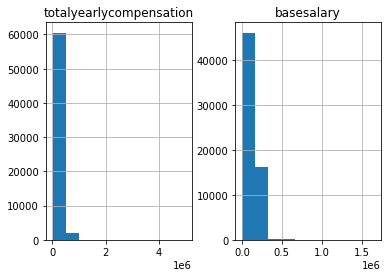

In [716]:
#Look at the distribution of values for totalyearlycompensation and base salary
salaries_df.hist(column = ["totalyearlycompensation", "basesalary"])

In [717]:
#Try a different way to explore the distribution of salaries in the dataset
x = salaries_df["rowNumber"]
y = salaries_df["totalyearlycompensation"]

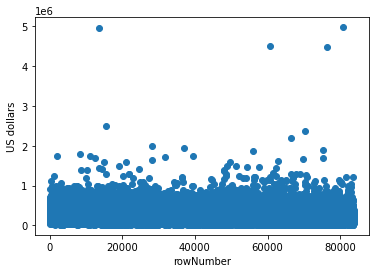

In [718]:
plt.scatter(x, y)

# Labeling the plot and showing it
plt.xlabel('rowNumber')
plt.ylabel('US dollars')
plt.show()

<AxesSubplot:>

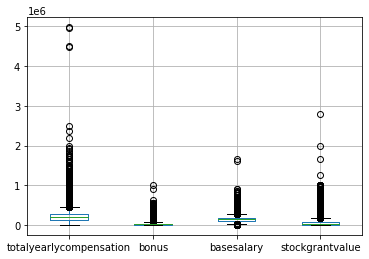

In [719]:
salaries_df.boxplot(column = ["totalyearlycompensation","bonus",'basesalary','stockgrantvalue'])
#There appear to be some high outlier values in totalyearlycompensation, and maybe stockgrantvalue

In [720]:
#Create a function to look for outliers
#copied from https://medium.com/@atanudan/exploratory-data-analysis-eda-in-python-893f963cc0c0
def findoutliers(column):
    outliers = []
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1<lower_limit:
           outliers.append(out1) 
    return np.array(outliers)

In [721]:
#look for outliers in 4 salary columns
row_count = salaries_df.count()['rowNumber']
totalcomp_outliers = len(findoutliers(salaries_df.totalyearlycompensation))
bonus_outliers = len(findoutliers(salaries_df.bonus))
base_outliers = len(findoutliers(salaries_df.basesalary))
stock_outliers = len(findoutliers(salaries_df.stockgrantvalue))
print(f" There are {totalcomp_outliers} ({totalcomp_outliers/float(row_count)*100}%) outliers in the totalyearlycompensation column")
print(f" There are {bonus_outliers} ({bonus_outliers/float(row_count)*100}%) outliers in the bonus column")
print(f" There are {base_outliers} ({base_outliers/float(row_count)*100}%) outliers in the basesalary column")
print(f" There are {stock_outliers} ({stock_outliers/float(row_count)*100}%) outliers in the stockgrantvalue column")

 There are 3133 (5.0018359755416135%) outliers in the totalyearlycompensation column
 There are 2604 (4.157287226399732%) outliers in the bonus column
 There are 3509 (5.602120152625445%) outliers in the basesalary column
 There are 4683 (7.4764117055414525%) outliers in the stockgrantvalue column


In [722]:
#Look at maximum values for these four columns
print(f"The max value in the totalyearlycompensation column is {salaries_df.totalyearlycompensation.max()}.")
print(f"The max value in the bonus column is {salaries_df.bonus.max()}.")
print(f"The max value in the basesalary column is {salaries_df.basesalary.max()}.")
print(f"The max value in the stockgrantvalue column is {salaries_df.stockgrantvalue.max()}.")
#These values are high but not unreasonable in this field. I think we should keep them.

The max value in the totalyearlycompensation column is 4980000.
The max value in the bonus column is 1000000.0.
The max value in the basesalary column is 1659870.
The max value in the stockgrantvalue column is 2800000.0.


In [723]:
#Stockgrantvalue has some weird low values, between .0001 and .01. Check other 3 salary columns for the same thing
total_under1 = salaries_df[(salaries_df['totalyearlycompensation']<10) & (salaries_df['totalyearlycompensation']>0)]
print(f" There were {total_under1.count()['rowNumber']} values between 0 and 10 for total salary")
bonus_under1 = salaries_df[(salaries_df['bonus']<10) & (salaries_df['bonus']>0)]
print(f" There were {bonus_under1.count()['rowNumber']} values between 0 and 10 for bonus salary")
base_under1 = salaries_df[(salaries_df['basesalary']<10) & (salaries_df['basesalary']>0)]
print(f" There were {base_under1.count()['rowNumber']} values between 0 and 10 for base salary")
stock_under1 = salaries_df[(salaries_df['stockgrantvalue']<10) & (salaries_df['stockgrantvalue']>0)]
print(f" There were {stock_under1.count()['rowNumber']} values between 0 and 10 for stockgrantvalue")

 There were 0 values between 0 and 10 for total salary
 There were 0 values between 0 and 10 for bonus salary
 There were 0 values between 0 and 10 for base salary
 There were 2 values between 0 and 10 for stockgrantvalue


In [724]:
#Fix stockgrantvalue for two very small values
salaries_df['stockgrantvalue'] = salaries_df['stockgrantvalue'].map(lambda x:0 if x<0.01 else x)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,0


In [725]:
#The location field for the companies in south korea had 3 commas, fixing that here
salaries_df['location'] = salaries_df['location'].map(lambda x:'Seoul, Korea, South' if x=='Seoul, KG, Korea, South' else x)
salaries_df['location'] = salaries_df['location'].map(lambda x:'Suwon, Korea, South' if x=='Suwon, KG, Korea, South' else x)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,0


In [726]:
#Split location into city, state, country values
location_list = salaries_df['location'].str.split(',\s+',expand=True)
location_list.columns = ['city','state','country']
location_list

,city,state,country
0,Redwood City,CA,None
1,San Francisco,CA,None
2,Seattle,WA,None
3,Sunnyvale,CA,None
4,Mountain View,CA,None
...,...,...,...
62637,Seattle,WA,None
62638,Redmond,WA,None
62639,Seattle,WA,None
62640,San Francisco,CA,None


In [727]:
#Add city, state, country columns back into main dataframe
salaries_df = pd.concat([salaries_df,location_list],axis=1)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,None
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,None
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,None
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,Sunnyvale,CA,None
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,None
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,None
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,None
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,None


In [728]:
#Fill USA in for country columm for US companies 
salaries_df['country'].fillna('USA', inplace=True)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [729]:
#Drop the original location column since we now have city, state, country split out from it
salaries_df = salaries_df.drop(['location'], axis=1)
salaries_df

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,5.0,3.0,0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62638,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
62639,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62640,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [730]:
salaries_df.country.value_counts()

USA                     52837
India                    2830
Canada                   1796
United Kingdom           1195
Germany                   576
                        ...  
Netherlands Antilles        1
Marshall Islands            1
Panama                      1
Guatemala                   1
Egypt                       1
Name: country, Length: 81, dtype: int64

In [731]:
#Write cleaned data to output file
salaries_df.to_csv("Resources/Cleaned_Salary_Data.csv",index=False)

In [732]:
# Load dependencies for Linear Regression
from sklearn.linear_model import LinearRegression

In [733]:
file_path = "Resources/Cleaned_Salary_Data.csv"

In [734]:
#Read input file into a new DataFrame
new_salaries_df = pd.read_csv(file_path)
new_salaries_df.head(10)

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,5.0,3.0,0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
5,Microsoft,Software Engineer,208000,8.5,8.5,0,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
6,Microsoft,Software Engineering Manager,300000,15.0,11.0,180000,65000.0,55000.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
7,Microsoft,Software Engineer,156000,4.0,4.0,135000,8000.0,13000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
8,Microsoft,Software Engineer,120000,3.0,1.0,0,0.0,0.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
9,Microsoft,Software Engineer,201000,12.0,6.0,157000,26000.0,28000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA


In [735]:
base_zero = new_salaries_df.loc[new_salaries_df['basesalary']==0]
base_zero

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
1,eBay,Software Engineer,100000,5.0,3.0,0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
5,Microsoft,Software Engineer,208000,8.5,8.5,0,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
8,Microsoft,Software Engineer,120000,3.0,1.0,0,0.0,0.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
12,Microsoft,Product Manager,150000,10.0,10.0,0,0.0,0.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11004,Apple,Software Engineer,240000,10.0,5.0,0,0.0,0.0,none,7158,...,0,0,0,0,0,0,0,Cupertino,CA,USA
14954,Facebook,Software Engineer,195000,3.0,1.0,0,0.0,0.0,Female,7300,...,0,0,0,0,0,0,0,Menlo Park,CA,USA
14971,IBM,Software Engineer,240000,15.0,10.0,0,0.0,0.0,Other,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
14976,Spotify,Software Engineer,310000,9.0,0.0,0,0.0,0.0,none,10182,...,0,0,0,0,0,0,0,New York,NY,USA


In [737]:
print(base_zero.sum()["bonus"])
print(base_zero.sum()["stockgrantvalue"])
bonus_not_zero = base_zero.loc[base_zero['bonus']>0]
bonus_not_zero


98000.0
192000.0


,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
2174,Bank of America Merrill Lynch,Data Scientist,156000,20.0,15.0,0,10000.0,16000.0,none,9594,...,0,0,0,0,0,0,0,Charlotte,NC,USA
3405,T-Mobile,Software Engineer,78000,0.0,0.0,0,0.0,10000.0,Female,11981,...,0,0,0,0,0,0,0,Bothell,WA,USA
4457,SAP,Software Engineer,140000,7.0,1.0,0,0.0,10000.0,Male,11470,...,0,0,0,0,0,0,0,Bellevue,WA,USA
5128,Facebook,Software Engineer,191000,9.0,4.0,0,150000.0,32000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
6533,Salesforce,Software Engineer,178000,5.0,4.0,0,11000.0,25000.0,none,10182,...,0,0,0,0,0,0,0,New York,NY,USA
10764,Citrix Systems Inc,Product Manager,50000,13.0,2.0,0,0.0,5000.0,Male,42498,...,0,0,0,0,0,0,0,Bengaluru,KA,India


In [738]:
#drop rows where base is zero and bonus and/or stock >0
new_salaries_df.drop(bonus_not_zero.index,inplace=True)


In [739]:
base_zero = new_salaries_df.loc[new_salaries_df['basesalary']==0]
stock_not_zero =base_zero.loc[base_zero['stockgrantvalue']>0]
new_salaries_df.drop(stock_not_zero.index,inplace=True)

In [740]:
new_salaries_df

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,5.0,3.0,0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62633,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
62634,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62635,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [742]:
#For rows where basesalary = 0, set equal to totalyearlycompensation
new_salaries_df['basesalary'] = np.where(new_salaries_df["basesalary"]==0,new_salaries_df["totalyearlycompensation"],new_salaries_df["basesalary"])
new_salaries_df

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62633,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
62634,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62635,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [743]:
base_zero = new_salaries_df.loc[new_salaries_df['basesalary']==0]
base_zero

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country


In [744]:
#Make a subset of the clean data for the US only
# Drop rows where country is not "USA"
us_salaries_df = new_salaries_df[new_salaries_df.country == 'USA']
us_salaries_df

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62633,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
62634,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62635,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [745]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
X = us_salaries_df.yearsofexperience.values.reshape(-1, 1)

In [746]:
X[:5]

array([[1.5],
       [5. ],
       [8. ],
       [7. ],
       [5. ]])

In [747]:
# The shape of X is 52,837 rows, with a single feature (column)
X.shape

(52831, 1)

In [748]:
y = us_salaries_df.totalyearlycompensation
len (y)

52831

In [749]:
# Create a model with scikit-learn
model = LinearRegression()

In [750]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [751]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(52831,)


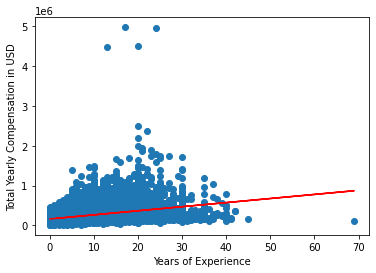

In [752]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

#font1 = {'family':'serif','color':'blue','size':20}
#plt.title('US Salaries by Years of Experience', fontdict = font1)

plt.xlabel('Years of Experience')
plt.ylabel('Total Yearly Compensation in USD')
plt.show()

In [753]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[10277.09525793]
160977.13984661523


In [754]:
#Check the correlation coefficent (r) to determine if the regression model can be used to predict salaries in the US based on years of experience
# r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
# See https://www.w3schools.com/python/python_ml_linear_regression.asp
from scipy import stats

X = us_salaries_df.yearsofexperience
y = us_salaries_df.totalyearlycompensation

slope, intercept, r, p, std_err  = stats.linregress(X, y)
print(r)

0.4445329962696131


In [755]:
# r = 0.44 (r2=0.19) is a weak correlation, this model could use improvement. 
#Other features may be better at predicting salaries than years of experience.  Outliers may be imapcting the model to some extent. 